# US School Analysis

## Start with imports and reading in your data

In [1]:
# Include all your imports here
import pandas as pd
from pathlib import Path
import seaborn as sns
from pprint import pprint

In [2]:
# Load the Public school dataset
path = Path("Resources/public_school_data.csv")
public_school_df = pd.read_csv(path)
public_school_df.head()

,NCESSCH,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [3]:
# Load the Public school locations dataset
path = Path("Resources/public_school_locations.csv")
public_school_locations_df = pd.read_csv(path)
public_school_locations_df.head()

,ID,LATCOD,LONCOD
0,10000500870,34.2602,-86.206200
1,10000500871,34.2622,-86.204900
2,10000500879,34.2733,-86.220100
3,10000500889,34.2527,-86.221806
4,10000501616,34.2898,-86.193300


In [4]:
# Load the Public school data dictionary file
path = Path("Resources/school_data_dictionary.csv")
public_school_dict_df = pd.read_csv(path)
public_school_dict_df.head(20)

,Fields,Field Descriptions
0,OBJECTID,OBJECTID
1,Shape,Shape
2,NCESSCH,Unique School ID
3,SURVYEAR,Year corresponding to survey record
4,STABR,Postal state abbreviation code
5,LEAID,NCES Agency ID
6,ST_LEAID,State Local Education Number
7,LEA_NAME,Education Agency Name
8,SCH_NAME,School name
9,LSTREET1,Location address street 1


## Data Exploration and Preparation

In [5]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv and identify the unique id column 
public_school_dict_df = public_school_dict_df[public_school_dict_df['Fields'].isin(public_school_df.columns)]
public_school_dict_df

,Fields,Field Descriptions
2,NCESSCH,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)
53,FTE,Total Teachers
54,STUTERATIO,Student teacher ratio
57,AM,All Students - American Indian/Alaska Native
60,AS,All Students - Asian
63,BL,All Students - Black or African American


In [6]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
print(f"The shape is: {public_school_df.shape[0]}")
print(f"The number of unique IDs is: {public_school_df['NCESSCH'].nunique()}")

The shape is: 100722
The number of unique IDs is: 100722


In [7]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index
public_school_df.rename(columns={"NCESSCH": "unique_id"}, inplace=True)
public_school_df.set_index("unique_id", inplace=True)

public_school_locations_df.rename(columns={"ID": "unique_id"}, inplace=True)
public_school_locations_df.set_index("unique_id", inplace=True)


In [8]:
# Check your work
public_school_df.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
unique_id,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [9]:
# Check your work
public_school_locations_df.head()

,LATCOD,LONCOD
unique_id,,
10000500870,34.2602,-86.206200
10000500871,34.2622,-86.204900
10000500879,34.2733,-86.220100
10000500889,34.2527,-86.221806
10000501616,34.2898,-86.193300


In [10]:
# Join the location and data dataframes together

school_data_df = pd.concat([public_school_locations_df, public_school_df],axis=1, join="outer")
school_data_df.head()

,LATCOD,LONCOD,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
unique_id,,,,,,,,,,,,,,,
10000500870,34.2602,-86.206200,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,34.2622,-86.204900,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,34.2733,-86.220100,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,34.2527,-86.221806,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,34.2898,-86.193300,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [11]:
# Get the value counts for the school type column
print(f"The number of school types: {school_data_df['SCHOOL_TYPE_TEXT'].count()}")

The number of school types: 100722


In [12]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
reg_schools_df = school_data_df[school_data_df['SCHOOL_TYPE_TEXT'] == "Regular school"]
reg_schools_df.shape[0]

91595

## Data Cleaning and dealing with nulls

In [13]:
# Check for nulls and determine the best approach for dealing with them
reg_schools_df.isnull().sum()

LATCOD                  0
LONCOD                  0
LSTATE                  0
SCHOOL_LEVEL            0
SCHOOL_TYPE_TEXT        0
TOTAL                 868
FTE                  6653
STUTERATIO            532
AM                  22158
AS                  11894
BL                   7059
HP                  32405
HI                   2257
TR                   4972
WH                   2368
dtype: int64

In [14]:
# Fill some of the columns with 0 where it makes sense
values = {"TOTAL": 0, "FTE": 0, "AM": 0, "AS": 0, "BL": 0, "HP": 0, "HI": 0, "TR": 0, "WH": 0}
reg_schools_df = reg_schools_df.fillna(value=values)


In [15]:
# Verify changes to nulls and prepare to drop na
reg_schools_df.isnull().sum()

LATCOD                0
LONCOD                0
LSTATE                0
SCHOOL_LEVEL          0
SCHOOL_TYPE_TEXT      0
TOTAL                 0
FTE                   0
STUTERATIO          532
AM                    0
AS                    0
BL                    0
HP                    0
HI                    0
TR                    0
WH                    0
dtype: int64

In [16]:
# Drop remaining nulls where it would make sense
reg_schools_df = reg_schools_df.dropna()

In [17]:
# Verify changes to nulls and no nulls should remain
reg_schools_df.isnull().sum()

LATCOD              0
LONCOD              0
LSTATE              0
SCHOOL_LEVEL        0
SCHOOL_TYPE_TEXT    0
TOTAL               0
FTE                 0
STUTERATIO          0
AM                  0
AS                  0
BL                  0
HP                  0
HI                  0
TR                  0
WH                  0
dtype: int64

## Plotting to help Clean the Data

<Axes: ylabel='Frequency'>

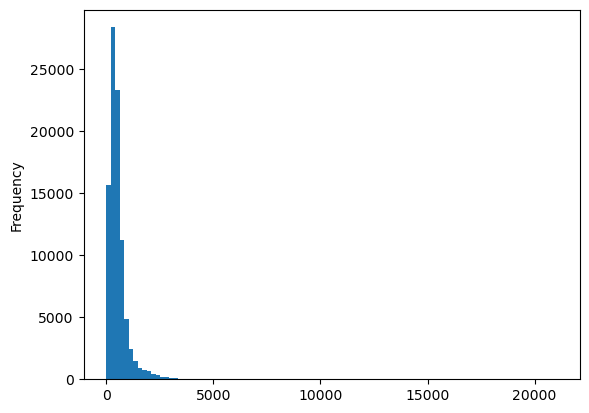

In [18]:
# Plot a histogram of Total enrolled students and check for outliers
reg_schools_df["TOTAL"].plot(kind='hist', bins=100)


<Axes: ylabel='Frequency'>

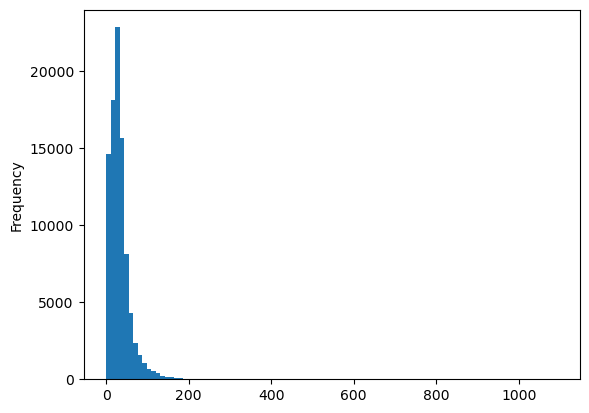

In [19]:
# Plot a histogram of Total Teachers and check for outliers
reg_schools_df["FTE"].plot(kind='hist', bins=100)


<Axes: ylabel='Frequency'>

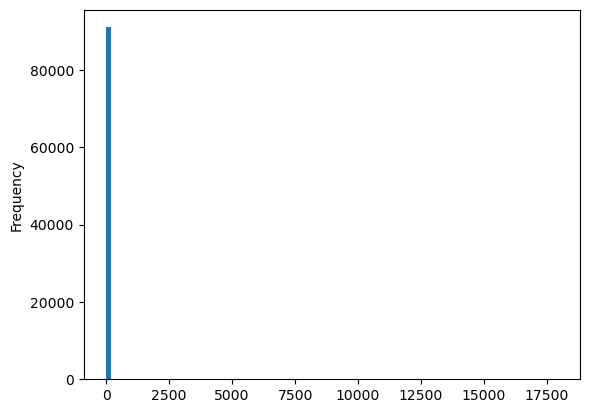

In [20]:
# Plot a histogram of Student Teacher Ratio and check for outliers
reg_schools_df["STUTERATIO"].plot(kind='hist', bins=100)


<Axes: ylabel='Frequency'>

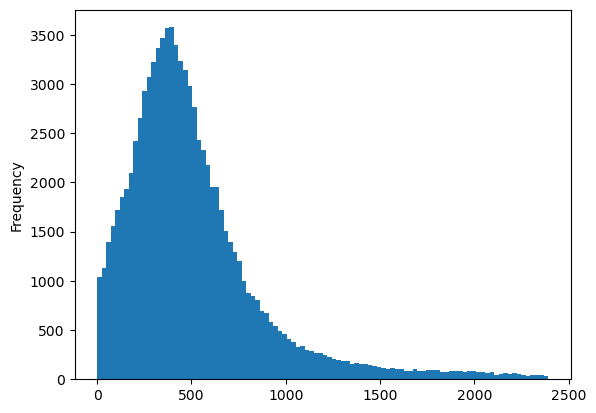

In [21]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
m1_q_high = reg_schools_df['TOTAL'].quantile(0.99)
total_filtered_df = reg_schools_df[(reg_schools_df['TOTAL'] > 0) & (reg_schools_df['TOTAL'] <= m1_q_high)]

total_filtered_df['TOTAL'].plot(kind='hist', bins=100)


<Axes: ylabel='Frequency'>

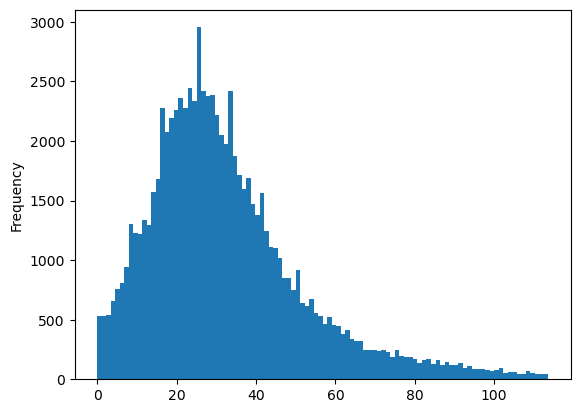

In [22]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile
m2_q_high = total_filtered_df['FTE'].quantile(0.99)
fte_filtered_df = total_filtered_df[(total_filtered_df['FTE'] > 0) & (total_filtered_df['FTE'] <= m2_q_high)]

fte_filtered_df['FTE'].plot(kind='hist', bins=100)



<Axes: ylabel='Frequency'>

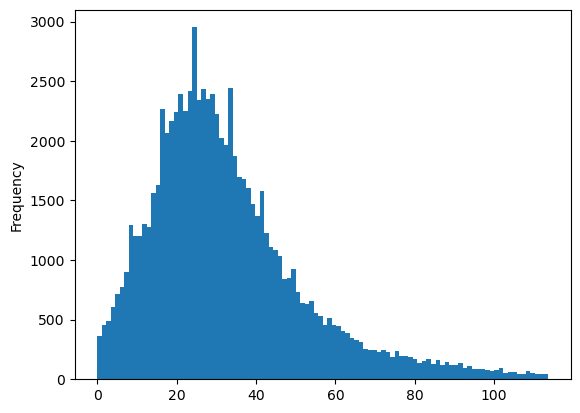

In [23]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
m3_q_high = fte_filtered_df['STUTERATIO'].quantile(0.99)
ratio_filtered_df = fte_filtered_df[(fte_filtered_df['STUTERATIO'] > 0) & (fte_filtered_df['STUTERATIO'] <= m3_q_high)]

ratio_filtered_df['FTE'].plot(kind='hist', bins=100)



## Correlation Plot to Understand Data Relationships

<Axes: >

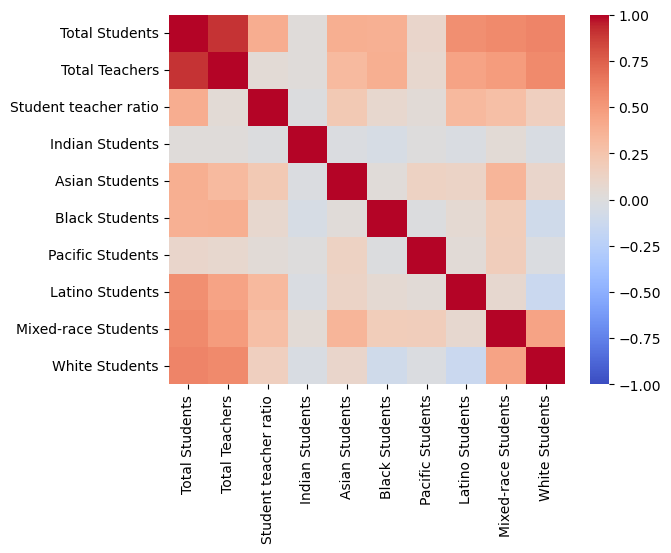

In [24]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe
ratio_filtered_df = ratio_filtered_df.rename(columns={"TOTAL": "Total Students", "FTE": "Total Teachers", "STUTERATIO": "Student teacher ratio", "AM": "Indian Students", "AS": "Asian Students", "BL": "Black Students", "HP": "Pacific Students", "HI": "Latino Students", "TR": "Mixed-race Students", "WH": "White Students"})
school_correlation = ratio_filtered_df[["Total Students", "Total Teachers", "Student teacher ratio", "Indian Students", "Asian Students", "Black Students", "Pacific Students", "Latino Students", "Mixed-race Students", "White Students"]].corr()
sns.heatmap(school_correlation, vmin=-1, vmax=1, cmap="coolwarm")

## Geographic Plots

Before the change: 53
After the change: 47


<Axes: xlabel='LONCOD', ylabel='LATCOD'>

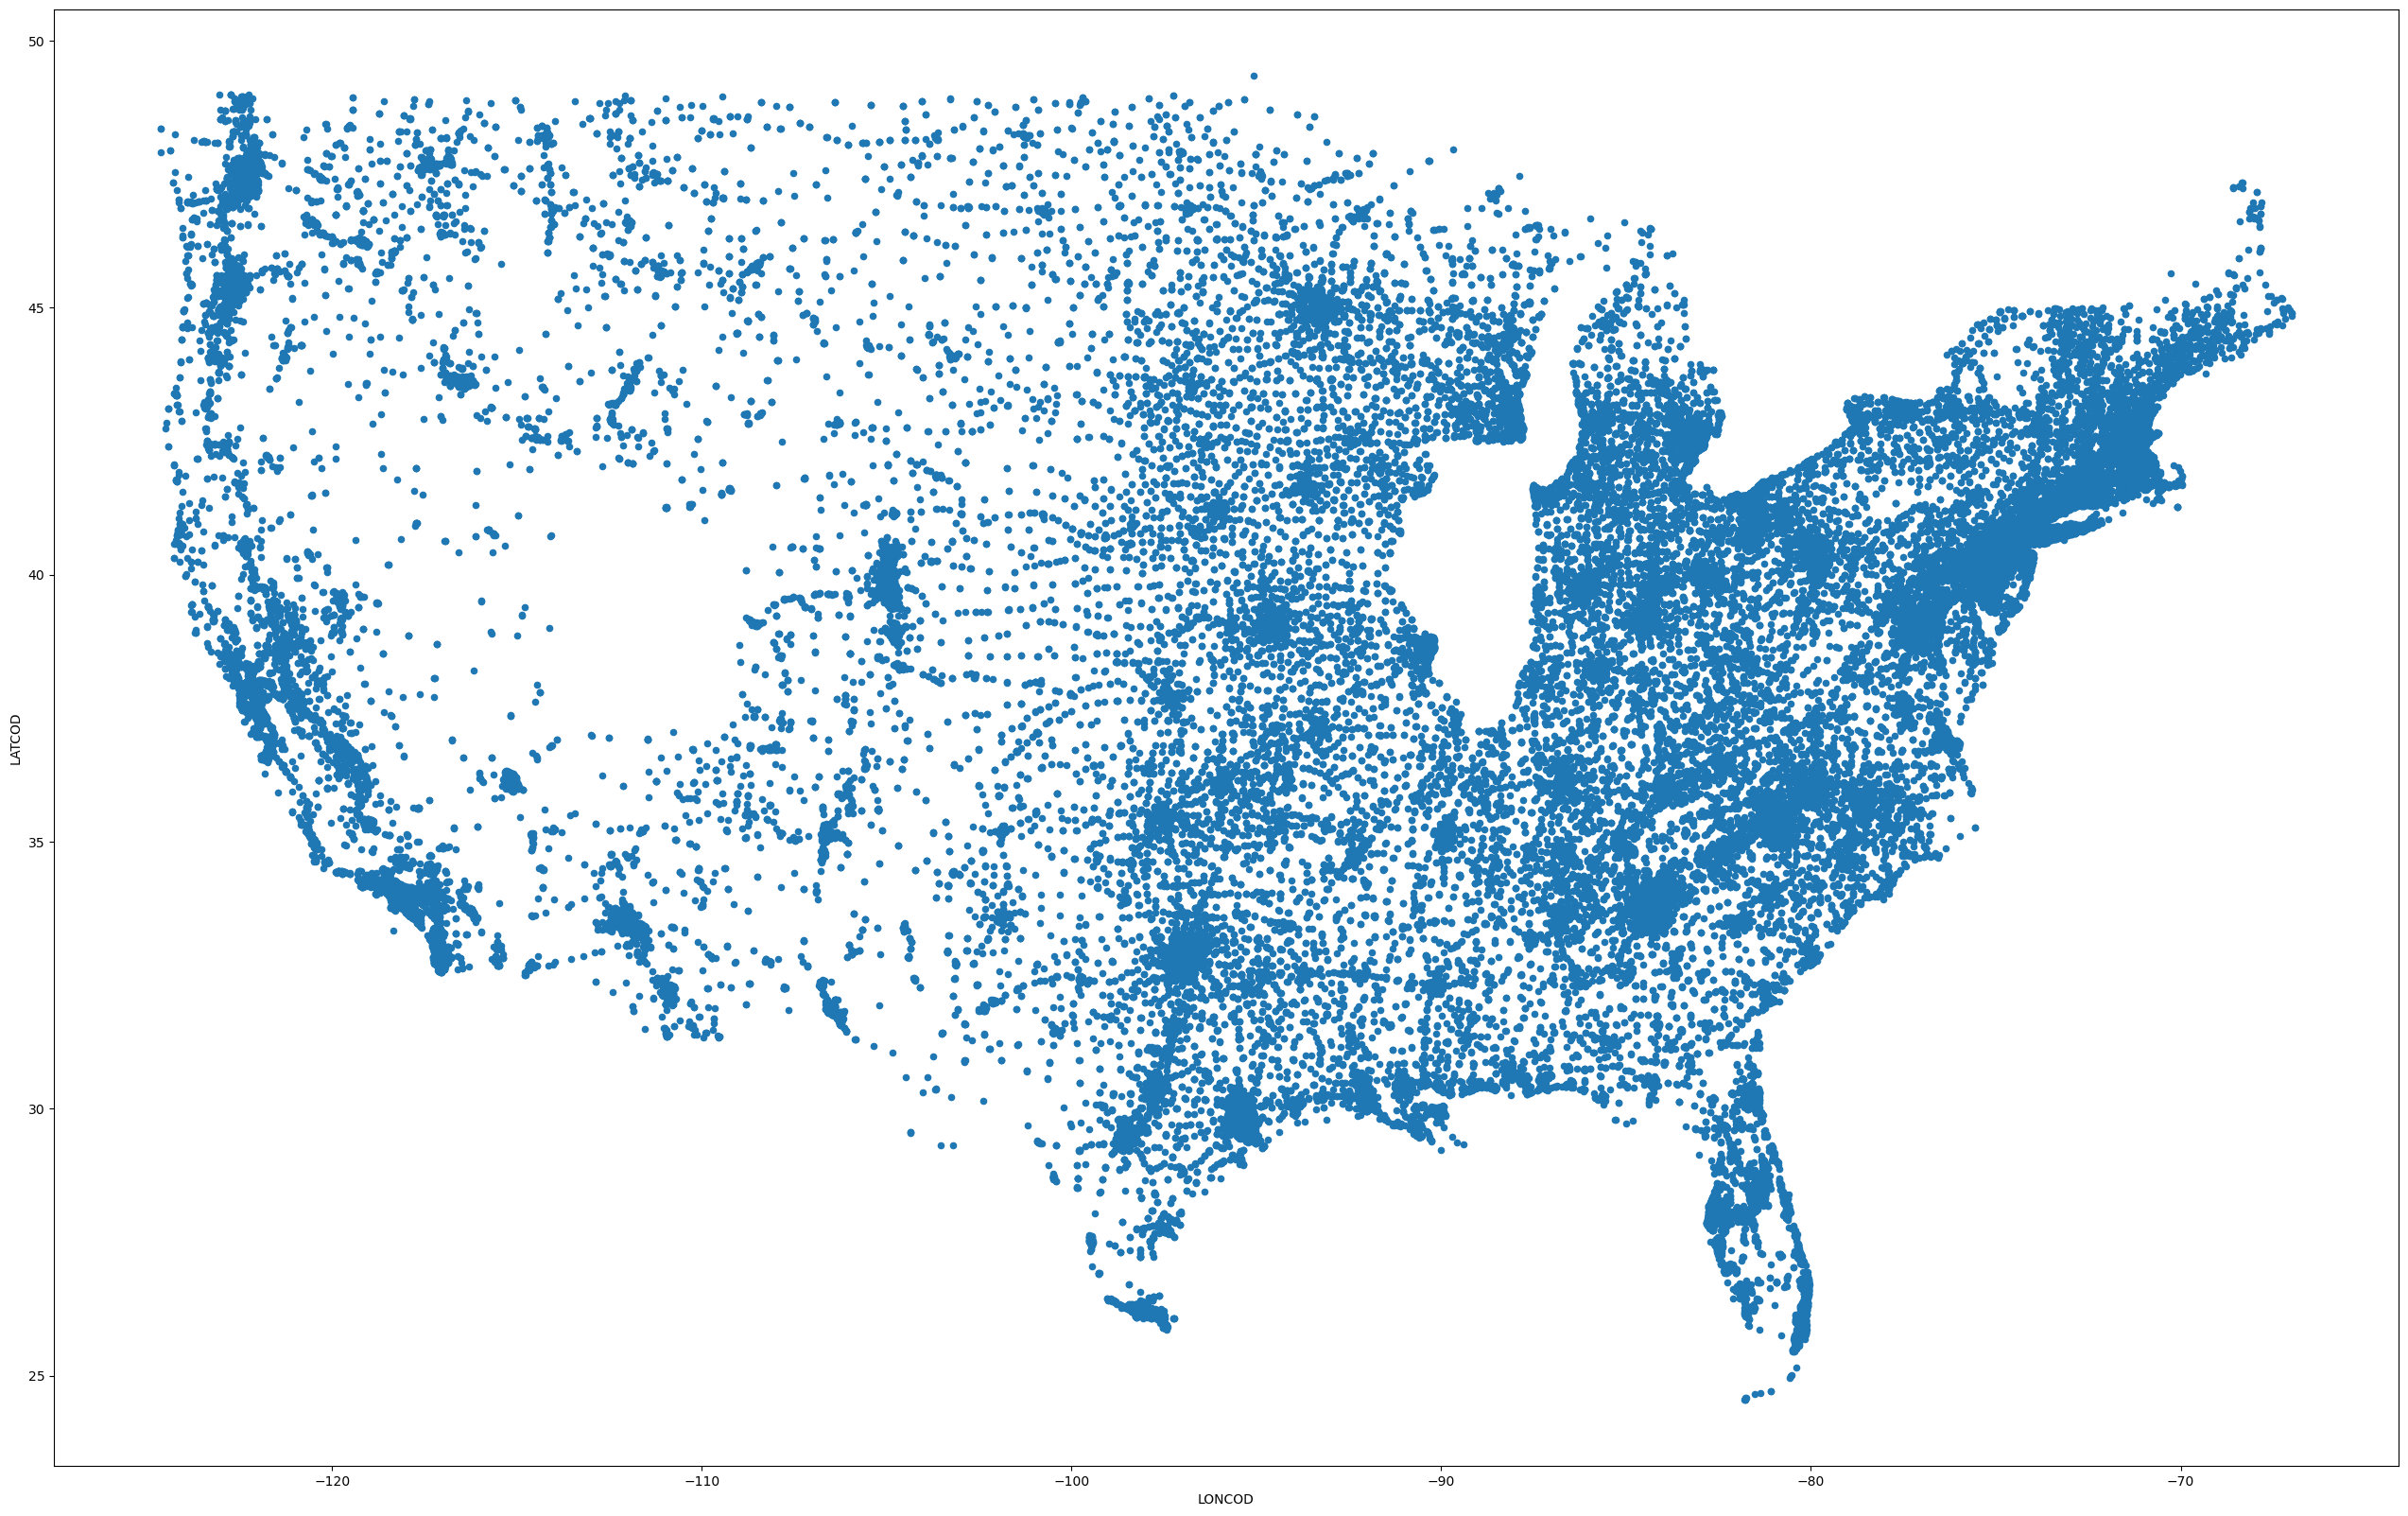

In [25]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)
# Check state counts
initial_count = ratio_filtered_df["LSTATE"].nunique()
print(f"Before the change: {initial_count}")

# Grab non-contiguous abbreviations
non_contiguous_list = ["AS", "AK", "DC", "GU", "HI", "MP", "PR", "TT", "VI"]

# Drop non-contiguous data
contiguous_df = ratio_filtered_df[~ratio_filtered_df["LSTATE"].isin(non_contiguous_list)]

# Check new state counts
post_count = contiguous_df["LSTATE"].nunique()
print(f"After the change: {post_count}")

# Create Geo scatter
contiguous_df.plot(kind='scatter', x='LONCOD', y='LATCOD', figsize=(32, 20))

In [26]:
# Plot only schools in your state
# Check my state
ut_count = contiguous_df.loc[contiguous_df["LSTATE"] == "UT"]["LSTATE"].value_counts()
print(f"Utah records: {ut_count}\n\n")
# My state only has 1 record. Check other states:
all_counts = contiguous_df["LSTATE"].value_counts()
print(all_counts)

Utah records: LSTATE
UT    1
Name: count, dtype: int64


LSTATE
CA    8530
TX    7725
NY    4364
OH    3311
FL    3172
MI    2852
PA    2764
NC    2506
NJ    2229
MO    2204
GA    2182
WI    2044
WA    1945
IN    1759
VA    1749
OK    1746
TN    1744
MA    1726
CO    1714
MN    1623
AZ    1362
AL    1307
LA    1285
KS    1276
MD    1268
IA    1267
KY    1192
OR    1192
SC    1160
AR    1018
NE     969
CT     956
MS     882
NM     861
MT     822
SD     663
ID     658
WV     638
NV     599
ME     570
ND     493
NH     487
WY     346
RI     299
VT     288
DE     188
UT       1
Name: count, dtype: int64


<Axes: xlabel='LONCOD', ylabel='LATCOD'>

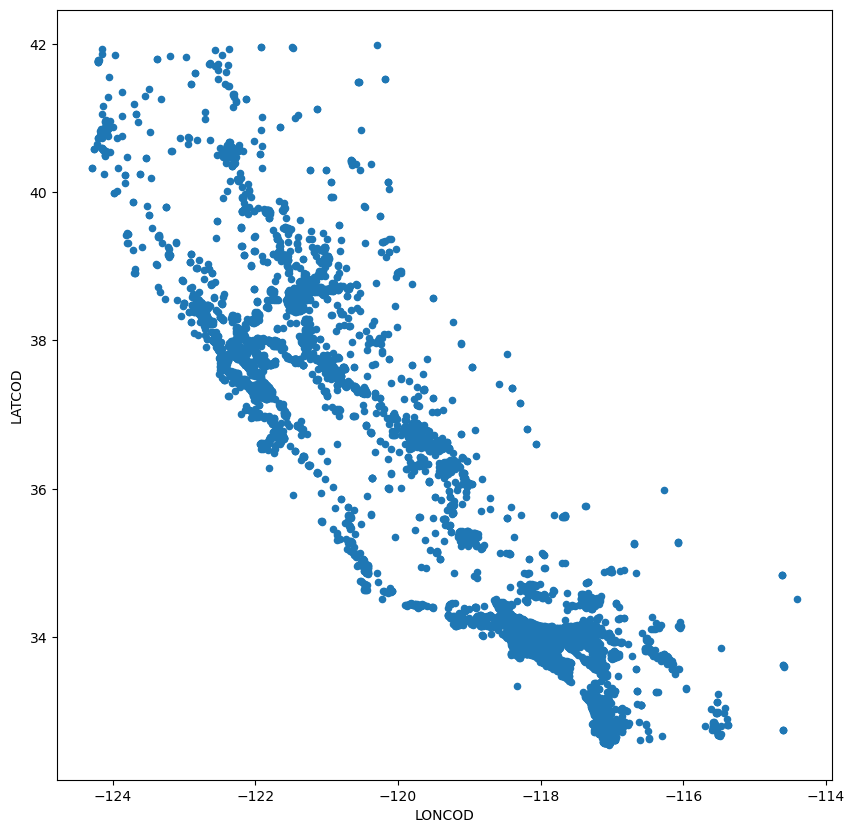

In [27]:
# CA has the most, using CA instead
ca_df = ratio_filtered_df[ratio_filtered_df["LSTATE"] == "CA"]
# Plot geo scatter for CA
ca_df.plot(kind='scatter', x='LONCOD', y='LATCOD', figsize=(10, 10))

<Axes: xlabel='LONCOD', ylabel='LATCOD'>

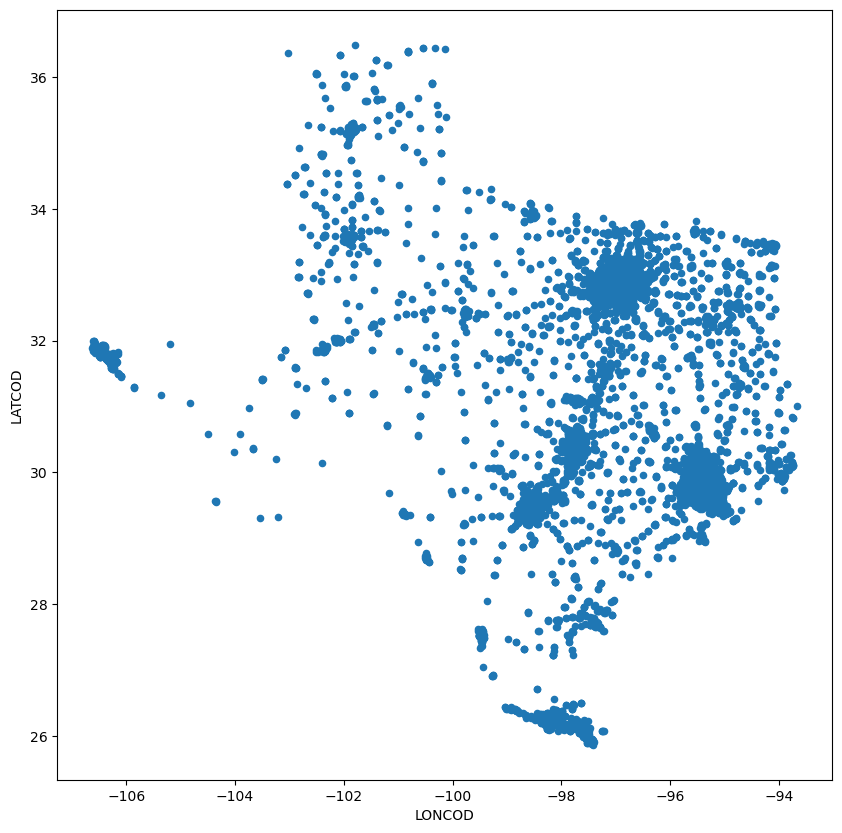

In [28]:
# CA looks okay, trying Texas for fun
tx_df = ratio_filtered_df[ratio_filtered_df["LSTATE"] == "TX"]
# Plot geo scatter for TX
tx_df.plot(kind='scatter', x='LONCOD', y='LATCOD', figsize=(10, 10))

## School Quality Analysis: Student/Teacher Ratios

In [61]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state

ratio_by_state = ratio_filtered_df.groupby("LSTATE")["Student teacher ratio"].mean()
print("All States: \n")
pprint(ratio_by_state.round(2))

All States: 

LSTATE
AK    12.85
AL    17.09
AR    12.99
AZ    16.60
CA    22.08
CO    15.38
CT    12.30
DC    11.87
DE    14.13
FL    16.24
GA    14.24
GU    14.67
HI    14.60
IA    14.04
ID    16.90
IN    15.45
KS    12.97
KY    15.32
LA    17.62
MA    12.17
MD    14.28
ME    10.82
MI    17.07
MN    15.26
MO    12.67
MS    14.30
MT    11.16
NC    14.99
ND    10.92
NE    12.53
NH    10.86
NJ    11.38
NM    13.71
NV    18.07
NY    12.02
OH    17.11
OK    14.35
OR    17.41
PA    13.71
PR    11.89
RI    13.51
SC    14.48
SD    12.66
TN    14.86
TX    14.09
UT    12.38
VA    14.22
VI    12.95
VT    11.68
WA    16.03
WI    13.48
WV    13.64
WY    10.97
Name: Student teacher ratio, dtype: float64


In [54]:
# What is the mean of the Student/Teacher Ratio

ratio_by_state.mean().round(2)

14.13

In [56]:
# What is the standard deviation of the Student/Teacher Ratio

ratio_by_state.std()

2.239623509923686

<Axes: title={'center': 'Student Teacher Ratio'}, xlabel='LSTATE'>

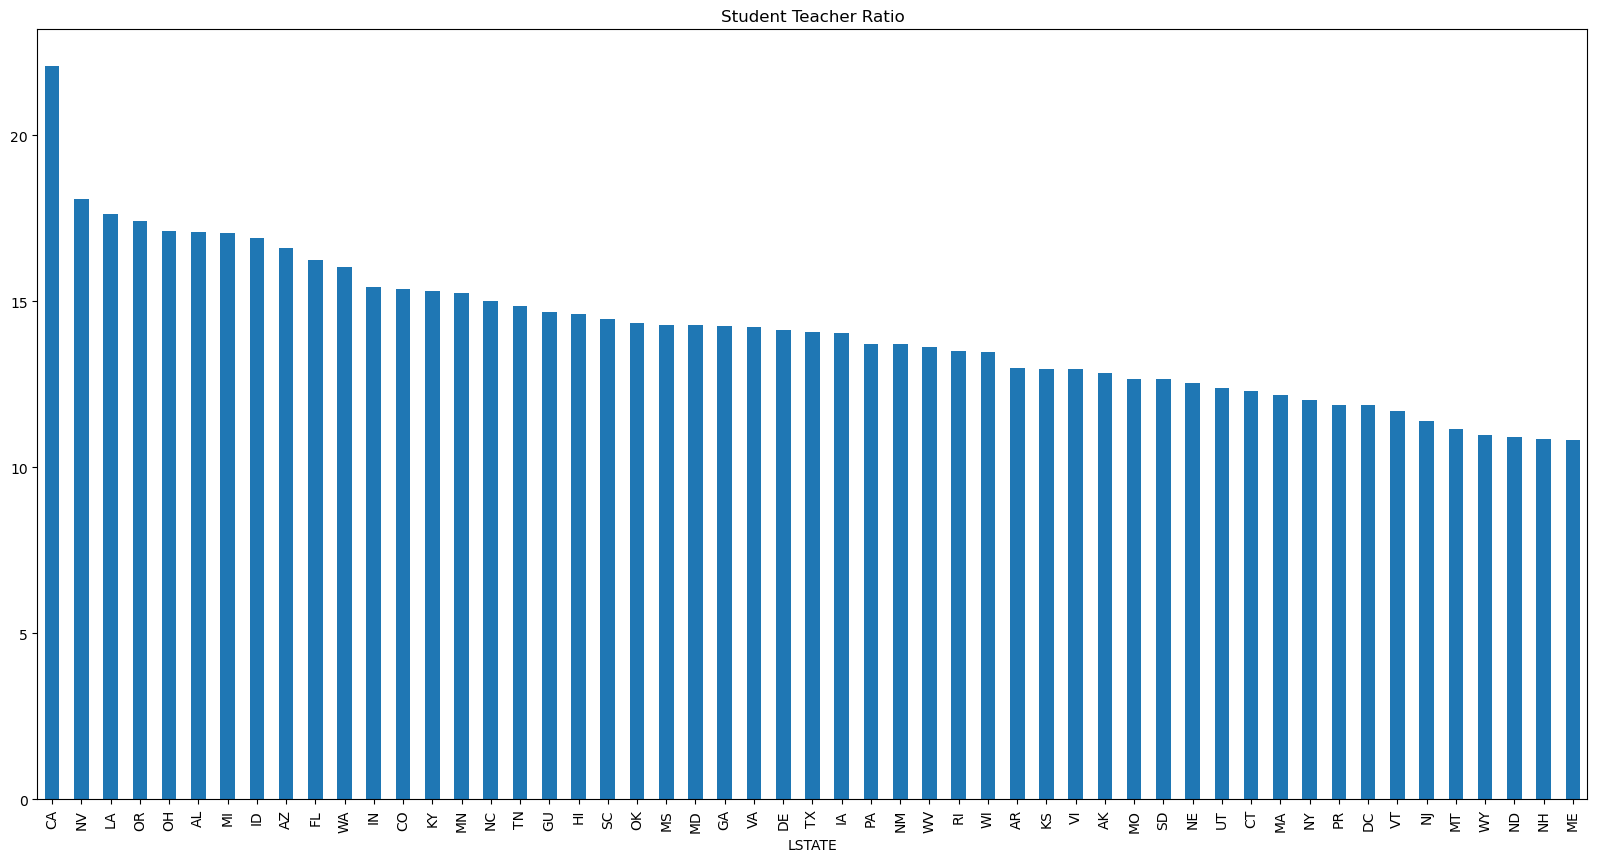

In [60]:
# Plot the states ratios in descending order

ratio_by_state.sort_values(ascending=False).plot(kind='bar', figsize=(20,10),title="Student Teacher Ratio")

<Axes: >

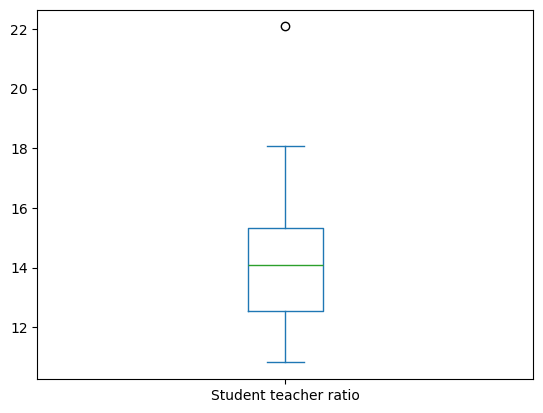

In [59]:
# Plot a boxplot of the Student/Teacher Ratios

ratio_by_state.plot(kind="box")

<Axes: xlabel='LSTATE'>

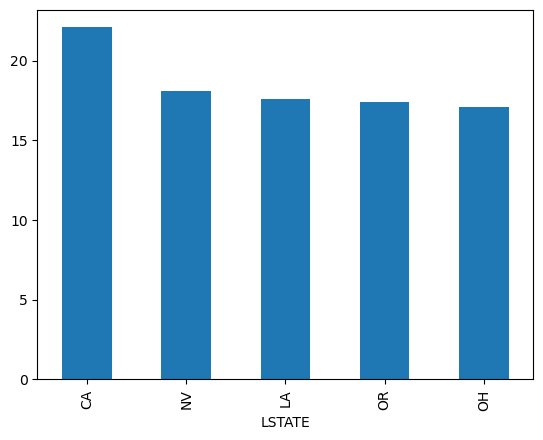

In [65]:
# List or Plot the Highest 5 states

ratio_by_state.nlargest(10).head().plot(kind="bar")

<Axes: xlabel='LSTATE'>

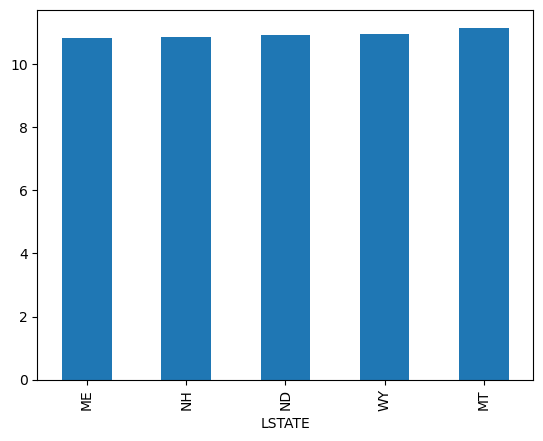

In [66]:
# List or plot the lowest 5

ratio_by_state.nsmallest(10).head().plot(kind="bar")


In [64]:
# Print your state's Student Teacher Ratios

pprint(f"The student/teacher ratio for TX is: {ratio_by_state['TX'].round(2)}")

'The student/teacher ratio for TX is: 14.09'


## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
    * _Racial segregation:_
        * _Whites were somewhat negatively correlated with Black, American Indian, and Latino students indicating some level of segregation though nothing extreme since the correlation was weak._
        * _Whites were not negatively correlated with Asian students._
        * _American Indian students were somewhat negatively correlated with all other races possibly as a result of many American Indians attending schools on reservations where they are segregated from other races._
    * _Student/Teacher ratio:_
        * _Student/Teacher ratio was somewhat positively correlated with the total number of students. Ideally, the ratio should stay the same as students increase (i.e., the school should hire more teachers to take care of the added students) so positive correlation is bad. It means that as the students increase, the schools are not hiring enough teachers to compensate. But the results also don't paint a terribly bleak picture—it's only fairly weakly positively correlated._
        * _Student/Teacher ratio was positively correlated with the number of Asian, Latino, Mixed-race students. It was only very weakly correlated to the number of Black or White students. Again, a positive correlation is bad so it appears that schools with a greater number of Asian, Latino, and mixed-race students do a slightly worse job hiring enough teachers._
* How did your state compare to others?
    * _Texas was near the middle in terms of its student/teacher ratio._
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
    * _Honestly, no, I think the decisions were pretty good. We lost about 20,000 rows of data but looking at the remaining data in the geo plots, it actually seems to do a good job of reflecting the general population. That is, dense clusters of data seem to follow US population patterns rather than being skewed in strange ways (with the exception of Illinois and Utah)._
* What is going on in IL?
    * _They didn't report in apparently. And Utah only reported data from one school._
* What other analysis could be done with this data?
    * _You could probably report on the racial concentrations in different locations. You could also report the teacher concentrations and you might be able to estimate population densities by looking at student numbers along with location data. (Not totally positive about that.)_

## BONUS: Generate other interesting analysis or plots

In [68]:
# Your code below
